In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
from sklearn.model_selection import train_test_split

%matplotlib inline

In [68]:
class MeanShiftClustering:
    
    def __init__(self, bandwidth = None, bandwidth_norm_step = 100):
        self.bandwidth = bandwidth
        self.bandwidth_norm_step = bandwidth_norm_step
        self.centroids = None
    
    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1-x2) ** 2))
    
    def fit(self, X):
        
        if self.bandwidth == None:
            initial_centroid = np.average(X, axis=0)
            self.bandwidth = np.linalg.norm(initial_centroid) / self.bandwidth_norm_step
        
        centroids = {}
        for idx in range(0, len(X)):
            centroids[idx] = X[idx]
        
        weights = [i for i in range(self.bandwidth_norm_step)][::-1]
        
        while True:
            new_centroids = []
            for idx in centroids:
                in_bandwidth = []
                centroid = centroids[idx]
                for sample in X:
                    distance = self._euclidean_distance(sample, centroid)
                    if distance == 0:
                        distance = 0.0000001
                    weight_index = int(distance/self.bandwidth)
                    if weight_index > self.bandwidth_norm_step - 1:
                        weight_index = self.bandwidth_norm_step - 1
                    
                    to_add = (weights[weight_index]**2)*[sample]
                    in_bandwidth += to_add
                new_centroid = np.average(in_bandwidth, axis = 0)
                new_centroids.append(tuple(new_centroid))
            
            uniques = sorted(list(set(new_centroids)))
            to_pop = []
            for idx1 in uniques:
                for idx2 in uniques:
                    if idx1 == idx2:
                        pass
                    elif self._euclidean_distance(np.array(idx1), np.array(idx2)) <= self.bandwidth:
                        to_pop.append(idx2)
                        break
            
            for idx in to_pop:
                try:
                    uniques.remove(idx)
                except:
                    pass
            
            prev_centroids = dict(centroids)
            centroids = {}
            for idx in range(len(uniques)):
                centroids[idx] = np.array(uniques[idx])
            optimized = True
            for idx in centroids:
                if not np.array_equal(centroids[idx], prev_centroids[idx]):
                    optimized = False
                if not optimized:
                    break
            if optimized:
                break
        
        self.centroids = centroids
    
    def predict(self, X):
        y = np.zeros(len(X), dtype=int)
        self.labels = {}
        for idx in range(len(self.centroids)):
            self.labels[idx] = []
        for idx, sample in enumerate(X):
            distances = [self._euclidean_distance(sample, self.centroids[idx]) for idx in self.centroids]
            label = distances.index(min(distances))
            y[idx] = label
            
        return y

In [82]:
X, y = make_blobs(centers=5, n_samples=100, n_features=2, random_state=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [83]:
ms = MeanShiftClustering()
ms.fit(X_train)

y_train_pred = ms.predict(X_train) 
y_test_pred = ms.predict(X_test)

np.unique(y_train_pred)

array([0, 1, 2])

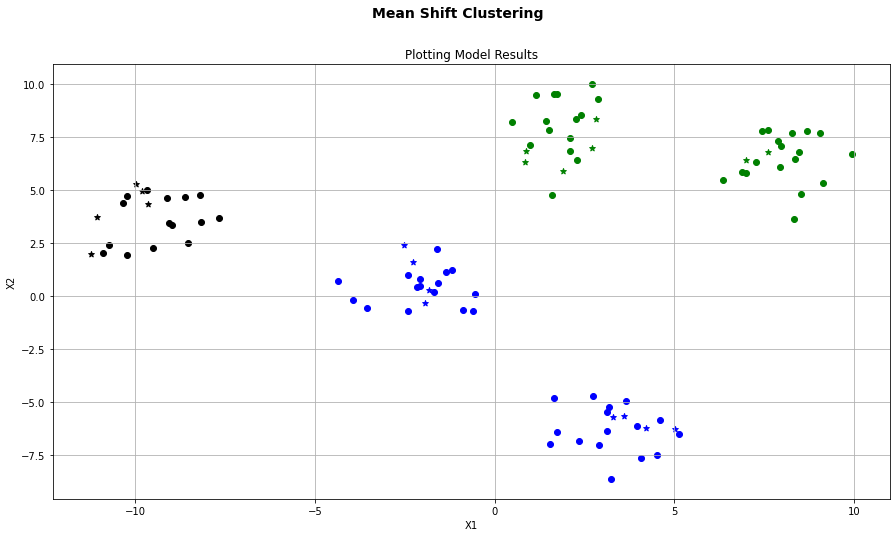

In [84]:
color = ['k', 'b', 'g', 'r', 'y', 'c', 'm', '#eeefff'] * 10
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("Mean Shift Clustering", fontsize=14, fontweight="bold")
ax.set_title("Plotting Model Results")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.grid(True)
for idx in range(0, len(y_train_pred)):
    plt.scatter(x = X_train[idx][0], y = X_train[idx][1], color = color[y_train_pred[idx]])
for idx in range(0, len(y_test_pred)):
    plt.scatter(x = X_test[idx][0], y = X_test[idx][1], marker = "*" , color = color[y_test_pred[idx]])
    
plt.show()

In [85]:
ms2 = MeanShift()
ms2.fit(X_train)

y_train_pred2 = ms.predict(X_train) 
y_test_pred2 = ms.predict(X_test)

np.unique(y_train_pred2)

array([0, 1, 2])

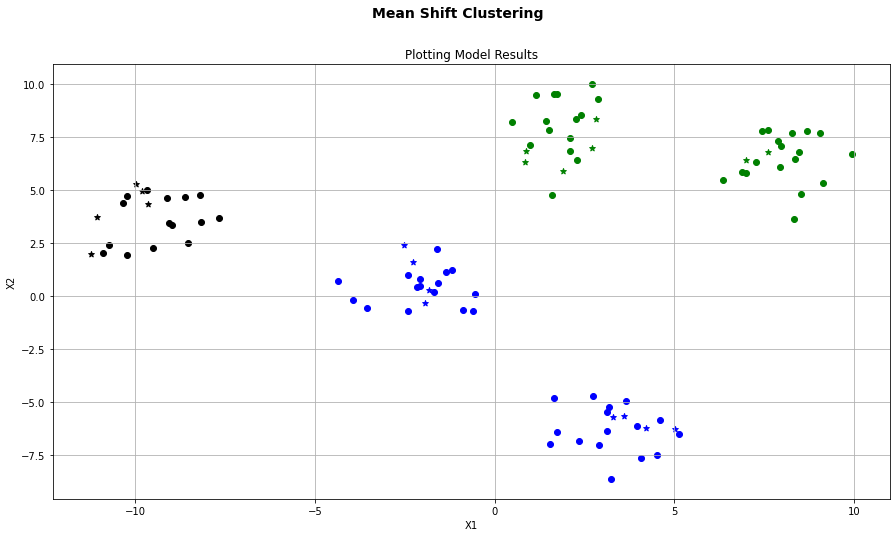

In [86]:
color = ['k', 'b', 'g', 'r', 'y', 'c', 'm', '#eeefff'] * 10
fig, ax = plt.subplots(figsize=(15, 8))
fig.suptitle("Mean Shift Clustering", fontsize=14, fontweight="bold")
ax.set_title("Plotting Model Results")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.grid(True)
for idx in range(0, len(y_train_pred)):
    plt.scatter(x = X_train[idx][0], y = X_train[idx][1], color = color[y_train_pred2[idx]])
for idx in range(0, len(y_test_pred)):
    plt.scatter(x = X_test[idx][0], y = X_test[idx][1], marker = "*" , color = color[y_test_pred2[idx]])
    
plt.show()